In [2]:
import numpy as np
x = np.array([2, 1, 4, 3, 5])
np.sort(x)

array([1, 2, 3, 4, 5])

In [3]:
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


In [4]:
rand = np.random.RandomState(42)
X = rand.randint(0, 10, (4, 6))
print(X)

[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [5]:
# sort each column of X
np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [6]:
# Partial Sorts: Partitioning

In [7]:
x = np.array([7, 2, 3, 1, 6, 5, 4])
np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [8]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [9]:
# Example: k-Nearest Neighbors

In [10]:
X = rand.rand(10, 2)

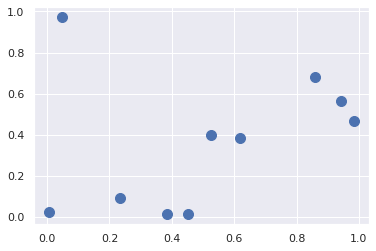

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
plt.scatter(X[:, 0], X[:, 1], s=100);

In [12]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [13]:
# for each pair of points, compute differences in their coordinates
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape

(10, 10, 2)

In [14]:
# square the coordinate differences
sq_differences = differences ** 2
sq_differences.shape

(10, 10, 2)

In [15]:
# sum the coordinate differences to get the squared distance
dist_sq = sq_differences.sum(-1)
dist_sq.shape

(10, 10)

In [16]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [19]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
nearest_partition

array([[3, 0, 9, 7, 1, 4, 2, 5, 8, 6],
       [1, 4, 7, 9, 3, 5, 6, 2, 8, 0],
       [2, 1, 4, 6, 3, 0, 5, 7, 8, 9],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4],
       [1, 8, 4, 5, 7, 6, 9, 3, 2, 0],
       [5, 8, 6, 4, 1, 7, 9, 3, 2, 0],
       [6, 8, 5, 4, 1, 7, 9, 3, 2, 0],
       [7, 9, 3, 1, 4, 5, 6, 2, 8, 0],
       [8, 5, 6, 4, 1, 7, 9, 3, 2, 0],
       [3, 9, 7, 0, 1, 5, 6, 2, 8, 4]])

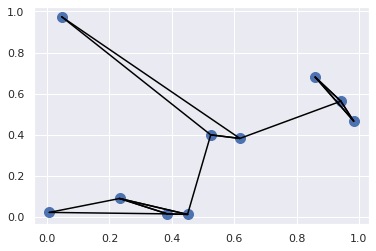

In [23]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')